<a href="https://colab.research.google.com/github/nyamskamau/Bank-Churn-Analysis/blob/main/Bank_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Defining the Question**

1. To outline the factors that are causing customers to leave the bank and offer solutions that will lead to less customer churning.
2. To predict whether a customer will close their bank account (1) or not (0) based on the features.





# **2.The Metric for Success**
1. The metric of Success for the analysis will be to effectively reduce customer churn at the Bank by implementing measures and solutions obtained from this analysis.
2. To build a classification model that can effectively predict customer churn within the bank with an accuracy_score of at least 0.85%.


# **3.The Context**

1. Churn is when a customer quits a service, and the goal of churn analysis is to effectively fight churn and increase customer retention.
2. Churn is closely tied to customer satisfaction, and for obvious reasons. Unhappy customers are more likely to leave, and when they do, they take a piece of your business with them.
3. For services such as Banks it is easier for them to retain customers than gain new customers , thus Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.
[Effects of Customer Churn](https://www.bullhorn.com/blog/2016/09/4-ways-customer-churn-hurts-business/)

# **4.The Experimental Design Taken**


Given the dataset at hand we will:
* Clean the data.
* Check for outliers and anomalies in  the dataset.
* Build our classification models.
* Select the best model and use it to predict whether a customer will close their bank account.

* We will evaluate our model performance using the Classification report,Confusion Matrix and the Accuracy_Score.
Ideally our best performing model should have an accuracy_score of over 90%.

* For this analysis we will build the following models:
  1. DecisionTreeClassifier
  2. RandomForestClassifier
  3. AdaBoosting and GradientBoostClassifer
  4. SVC models , evaluating the performance of the rbf, linear and the polynomial kernels.
  5. KNN classifier.
  6. XGBoost


# **5.The Appropriateness of the Data to Answer the Given Question.**

1. Given the Objective at hand ie predicting customer churn then the data provided is appropriate for us to carry out our analysis.

# **1.Data Preprocessing**

## 1.1.Importing the dataset previewing the columns.

In [ ]:
# Loading the Apporopriate Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set_style("whitegrid")
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
# Loading the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]

In [ ]:
df.tail()

RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...               0        38190.78      0

[5 rows x 14 columns]

In [ ]:
# Checking whether each column has an appropriate datatype
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# Checking the columns of the dataset
df.shape

(10000, 14)

The Dataset had 10,000 rows and 14 columns with the target variable being the 'Exited'.
It had both categorical and continuous variables.

>The descriptions for the columns in the dataset were :
>1. CreditScore: the range of credit score is from 350 to 850
>2. Geography: the regional bank has customers from three countries: France, Germany and Spain
>3. Age: the range of customer’s age is from 18 to 92
>4. Tenure: years that the customer has stayed with the bank
>5. Balance: the amount of money available for withdrawal
>6. NumOfProducts: number of products that the customers use in the bank
>7. IsActiveMember: 1 indicates is active
>8. EstimatedSalary: customer’s self-reported annual salary
>9. Exited: whether the customer has churned (closed the bank account), 1 indicates churn.

## **1.2.Data Cleaning**

>1. We dropped the unnecessary columns within the dataset.
We dropped the row number as it was a redundant column and the Surname as we would not be using this column in our analysis.

In [ ]:
df.drop(['RowNumber','Surname'],axis=1,inplace=True)

>1. We cleaned the data checking for any null values or duplicated entries in the dataset.


In [ ]:
df.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

> 1. The dataset had neither duplicated nor null entries and therefore we proceeded to carry out our EDA.

# **2.Exploratory Data Analysis.**

## **2.1.Univariate Data Analyisis**

We plotted the outliers within the variables in the dataset ,

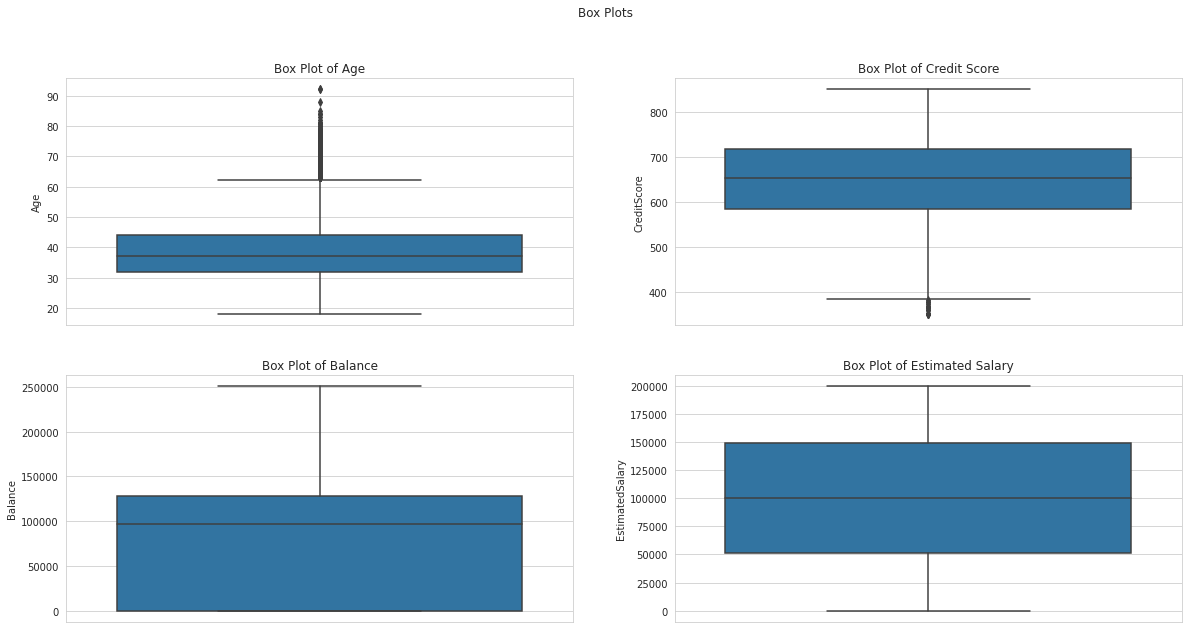

In [ ]:
# Plotting boxplots to check outliers. 
fig, ax = plt.subplots(2,2, figsize=(20,10))
fig.suptitle('Box Plots')
sns.boxplot(data=df, y = "Age", ax=ax[0,0])
ax[0,0].set_title('Box Plot of Age')
sns.boxplot(data=df, y = "CreditScore", ax=ax[0,1])
ax[0,1].set_title('Box Plot of Credit Score')
sns.boxplot(data=df, y = "Balance", ax=ax[1,0])
ax[1,0].set_title('Box Plot of Balance')
sns.boxplot(data=df, y = "EstimatedSalary", ax=ax[1,1])
ax[1,1].set_title('Box Plot of Estimated Salary')

plt.show()

We plotted boxplots for the continuous variables in the dataset.
The Age variable had many outliers , however given that many of the customers at the bank were aged 40 and below these outliers were expected and we did not drop them from the dataset.

We plotted the countplot of the categorical variables in the dataset

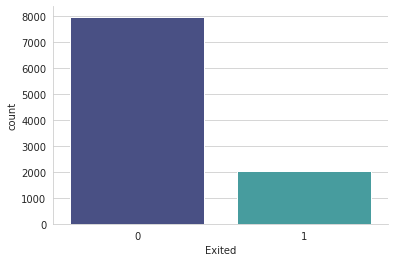

In [ ]:
sns.countplot(x=df.Exited,palette='mako')
sns.despine()

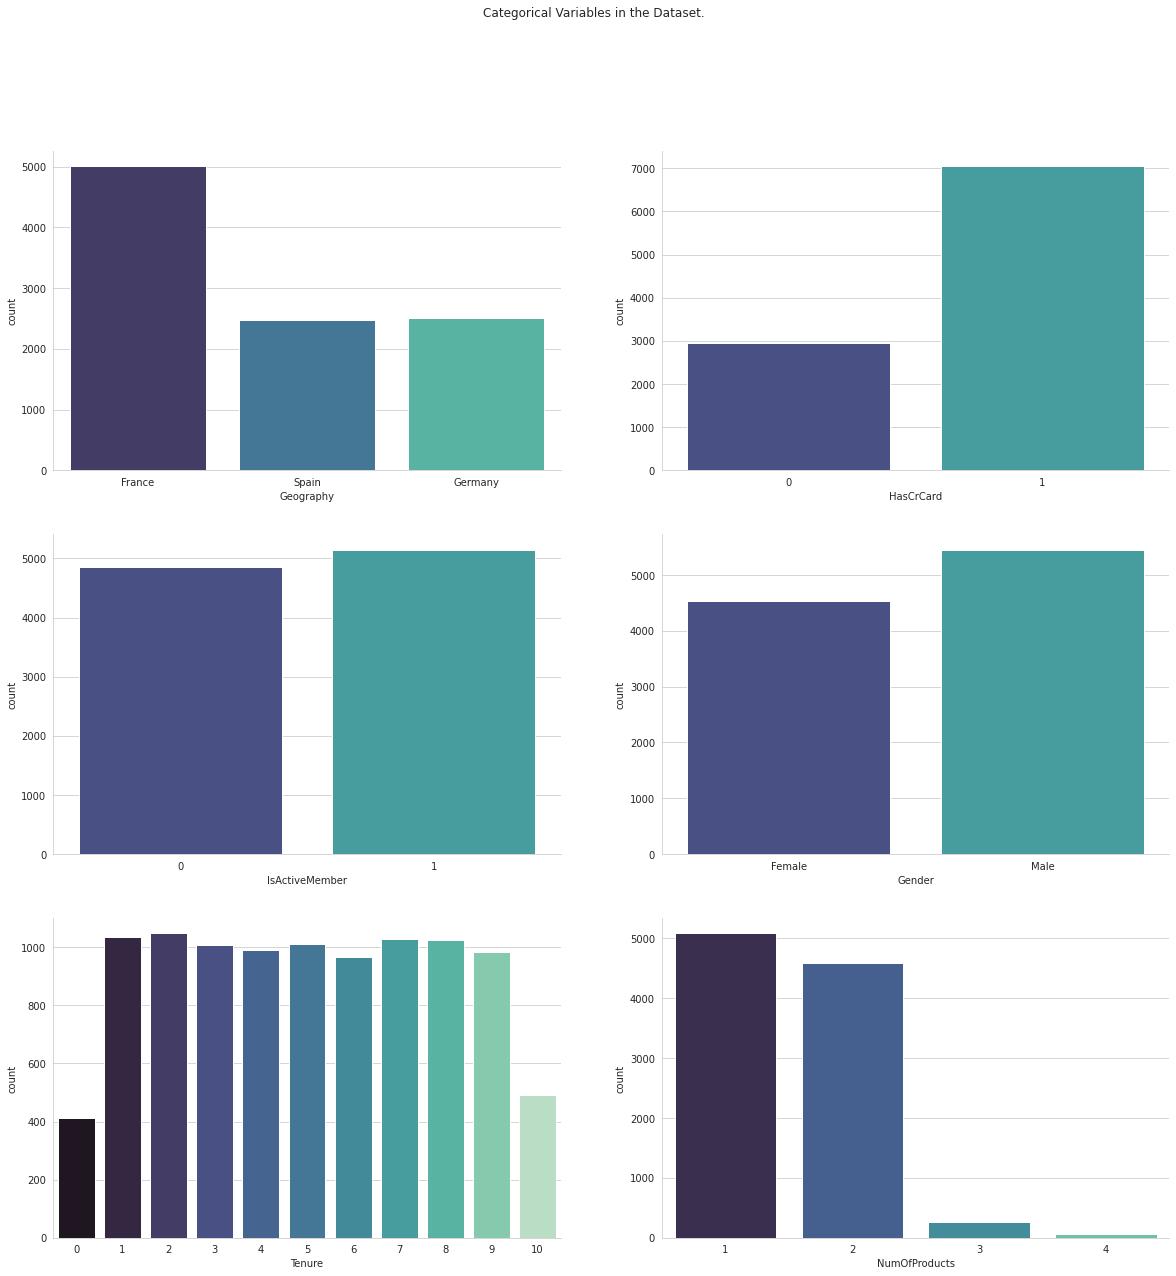

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
sns.color_palette("mako")
fig.suptitle('Categorical Variables in the Dataset.')

sns.countplot(ax=axes[0, 0], data=df, x='Geography',palette='mako')

sns.countplot(ax=axes[0, 1], data=df, x='HasCrCard',palette='mako')

sns.countplot(ax=axes[1, 0], data=df, x='IsActiveMember',palette='mako')

sns.countplot(ax=axes[1, 1], data=df, x='Gender',palette='mako')

sns.countplot(ax=axes[2, 0], data=df, x='Tenure',palette='mako')

sns.countplot(ax=axes[2, 1], data=df, x='NumOfProducts',palette='mako')

sns.despine()

1.From the countplots we can observe that , 
* At 5,000 ,France has the highest number of Customers in the Bank whereas Spain and Germany have approximately 2,300 customers.
* There are more male customers within the bank compared to female customers.
  * This was probably due to the fact that the employment rate in 2019 was still 11.7 percentage points higher for men than for women. 
* The Number of Customers who are active in the bank is 4,900 whereas the active Customers are 5,100.
* Many of the Customers in the Bank have credit cards.
* Majority of the customers in use only two services 
* The Number of Customers who left the bank were approximately 2,000 compared to the 8,000 who stayed.



We plotted the countplot of the continuous variables in the dataset

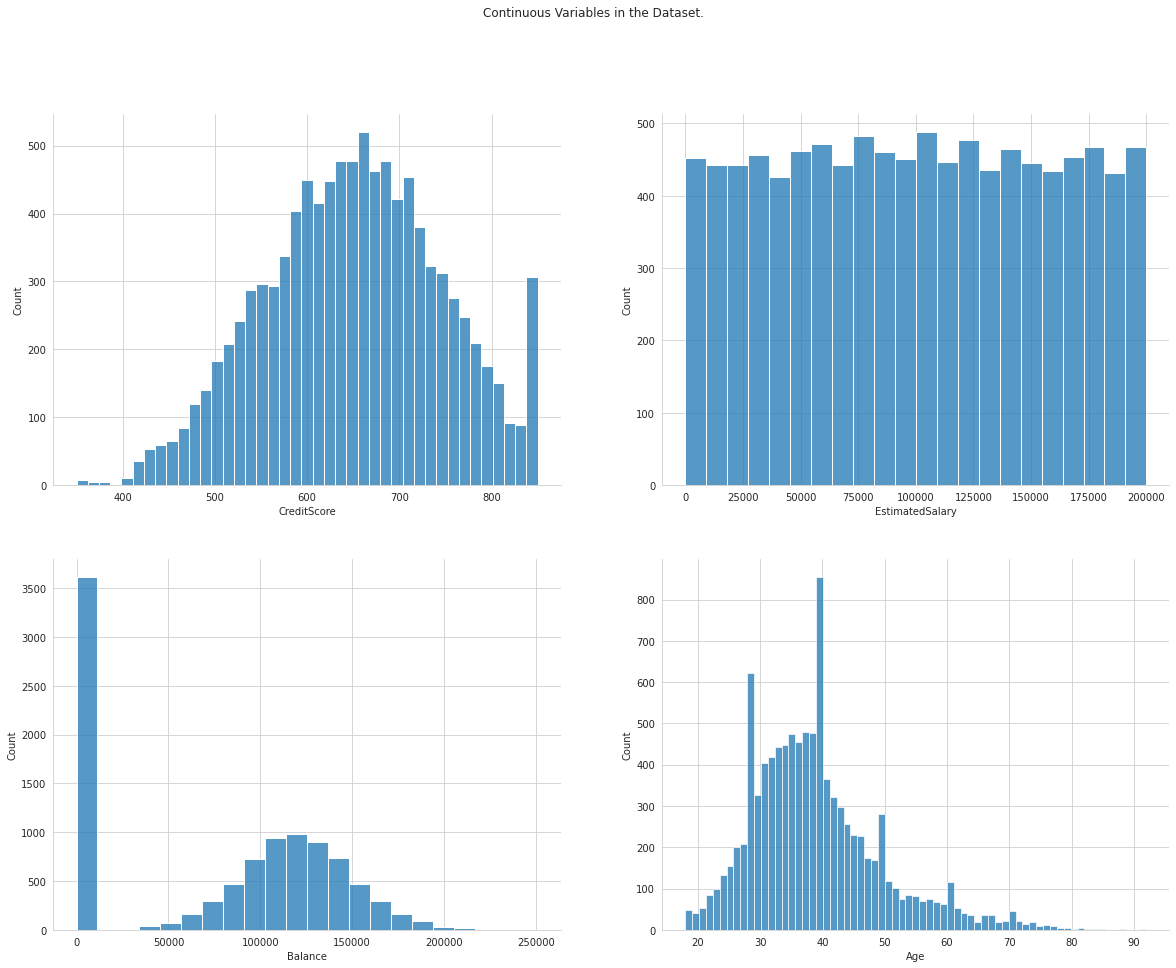

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

fig.suptitle('Continuous Variables in the Dataset.')
sns.histplot(ax=axes[0, 0], data=df, x='CreditScore',palette='gnuplot2_r')
sns.histplot(ax=axes[1, 0], data=df, x='Balance',palette='gnuplot2_r')
sns.histplot(ax=axes[1, 1], data=df, x='Age',palette='gnuplot2_r')
sns.histplot(ax=axes[0, 1], data=df, x='EstimatedSalary',palette='gnuplot2_r')
sns.despine()

1. Most Customers at the Bank have a Credit Score of between 600-700.
* Credit Scores ranging between 620-680 are said to have average credit whereas customers with credit scores of 740 are said to have good credit .[What are Credit Scores](hhttps://lendedu.com/blog/the-differences-between-good-and-bad-credit-scores/ttps://)

<table class="tsGd"><tbody><tr><th>Credit Score</th><th>Rating</th><th>% of People</th><th>Impact</th></tr><tr><td>300-499</td><td>Very Poor</td><td>5%</td><td>Applicants will not likely be approved for credit.</td></tr><tr><td>500-600</td><td>Poor</td><td>21%</td><td>Applicants may be approved for some credit, though rates may be unfavorable and with conditions such as larger down payment amounts.</td></tr><tr><td>601-660</td><td>Fair</td><td>13%</td><td>Applicants may be approved for credit but likely not at competitive rates.</td></tr><tr><td>661-780</td><td>Good</td><td>38%</td><td>Applicants likely to be approved for credit at competitive rates.</td></tr><tr><td>781-850</td><td>Excellent</td><td>23%</td><td>Applicants most likely to receive the best rates and most favorable terms on credit accounts.</td></tr></tbody></table>

2. The Salaries for the Customers in the Bank was uniformly distributed.
3. Majority of the Customers in the Bank have a zero acoount balance(almost 3,500) customers.
4. The mode age of the customers in the Bank was 40. Whereas the age range with the least amount of acccout holders was 70-84. 

## **2.2.Bivariate Data Analysis**

1. We plotted outliers for the Variables in the dataset with the Target variable being the hue.


<function seaborn.utils.despine>

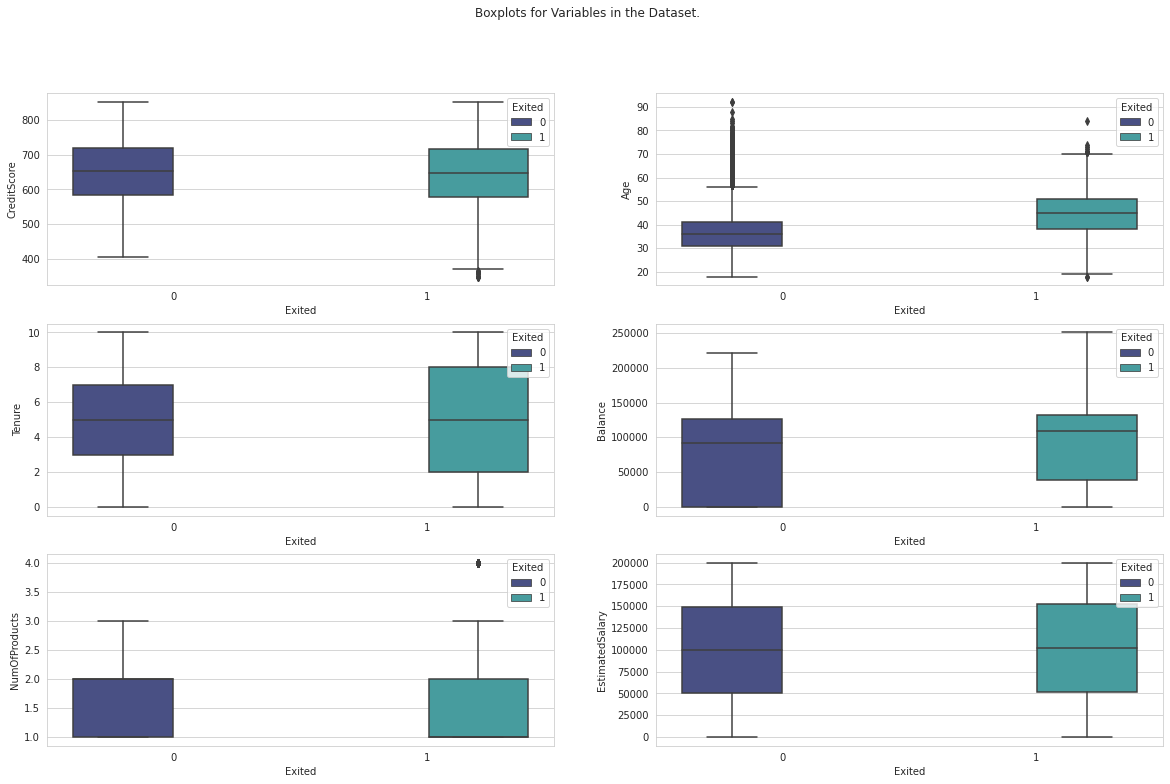

In [ ]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
fig.suptitle('Boxplots for Variables in the Dataset.')
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0],palette='mako')
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1],palette='mako')
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0],palette='mako')
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1],palette='mako')
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0],palette='mako')
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1],palette='mako')
sns.despine


* There were several outliers in the Age column for the Customers that stayed at the bank.
However , given that from our analysis we noted that many of the older customers (60 and above) did not leave the bank.
Hence we did not drop these customers from the dataset.
The other columns did not have any outliers.

We plotted the histplot of the continuous variables in the dataset

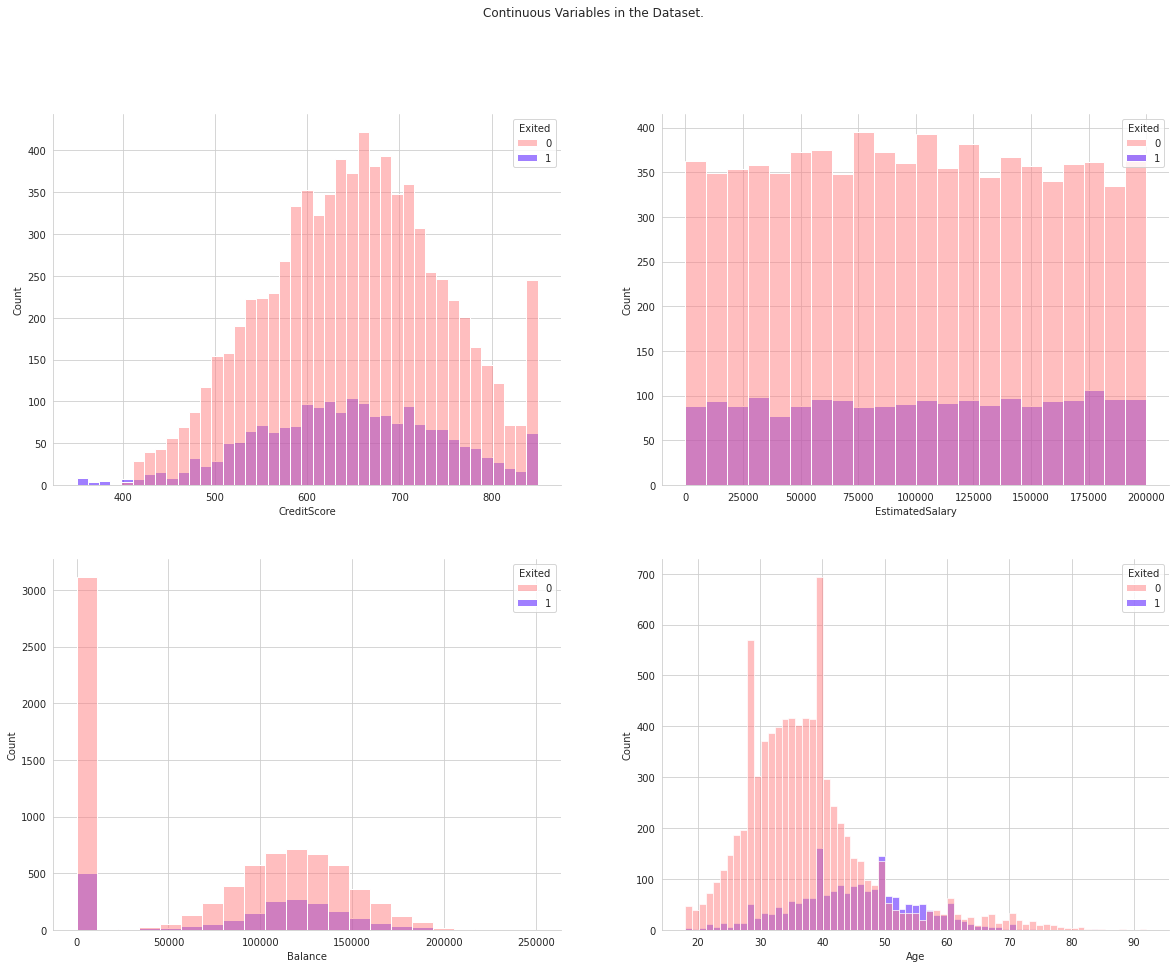

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

fig.suptitle('Continuous Variables in the Dataset.')
sns.histplot(ax=axes[0, 0], x='CreditScore',data=df,hue='Exited',palette='gnuplot2_r')
sns.histplot(ax=axes[1, 0], data=df, x='Balance',hue='Exited',palette='gnuplot2_r')
sns.histplot(ax=axes[1, 1], data=df, x='Age',hue='Exited',palette='gnuplot2_r')
sns.histplot(ax=axes[0, 1], data=df, x='EstimatedSalary',hue='Exited',palette='gnuplot2_r')
sns.despine()

Comparing our continuous variables to the Target we can see that :
* Many of the Customers that left the bank had an average credit score of between  600-700 , however this is also proportional to the number of customers within that Credit Score range.
* When compared to the estimated salary the number of account holders that left the bank is uniformly distributed.
* When analyzing the Balance variable we can see that majority of customers that left the bank had no money saved in their accounts.
Hence  the monthly bank fees and other expenses may have lead them to close their accounts.
* The number of Customers aged 50-55 that closed their accounts were more than those that stayed at the Bank.

We plotted the countplot of the categorical variables in the dataset based on 

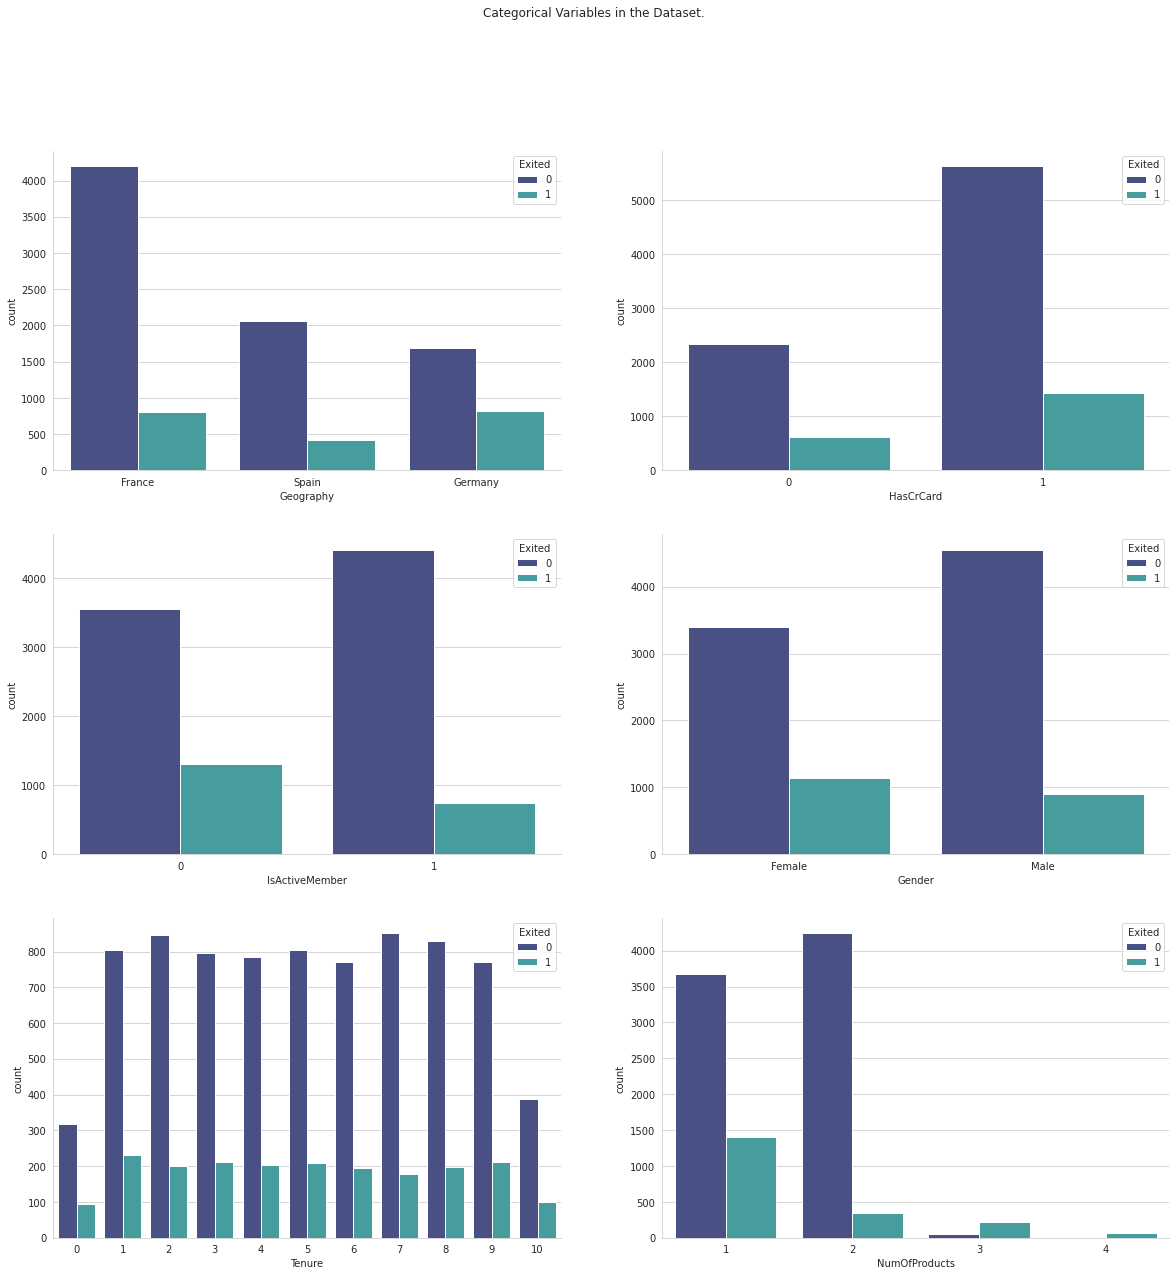

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

fig.suptitle('Categorical Variables in the Dataset.')

sns.countplot(ax=axes[0, 0], data=df, x='Geography',hue='Exited',palette='mako')
sns.countplot(ax=axes[0, 1], data=df, x='HasCrCard',hue='Exited',palette='mako')
sns.countplot(ax=axes[1, 0], data=df, x='IsActiveMember',hue='Exited',palette='mako')
sns.countplot(ax=axes[1, 1], data=df, x='Gender',hue="Exited",palette='mako')
sns.countplot(ax=axes[2, 0], data=df, x='Tenure',hue='Exited',palette='mako')
sns.countplot(ax=axes[2, 1], data=df, x='NumOfProducts',hue='Exited',palette='mako')
sns.despine()

From the countplots we can concur that :
1. Many of the Customers who left the Bank were female , this was particularly interesting as there were less female customers compared to male customers.
  * A study by the Erasmus University showed that once men found a brand that worked for them, they were more likely to stick with it, while women showed a greater degree of loyalty if they received a good service.
  * Therefore the rate women are leaving the bank could be an indicator that the services being offered are unsatisfactory.
2.  Majority of the people that left the Bank , approximately 700 from each location , were located in France and Germany.
3. Many of the Customers that left the Bank also did not have credit cards , furthermore those using only were service at the bank also had a higher churn compared to those using two or more services.
4. More inactive customers at the bank closed their accounts , compared to their active counterparts.
5.  Analysing the Tenure of the customers at the bank those that churned seem to be almost equal all through the years , however the highest number of customers churned after completeing one year at the Bank.

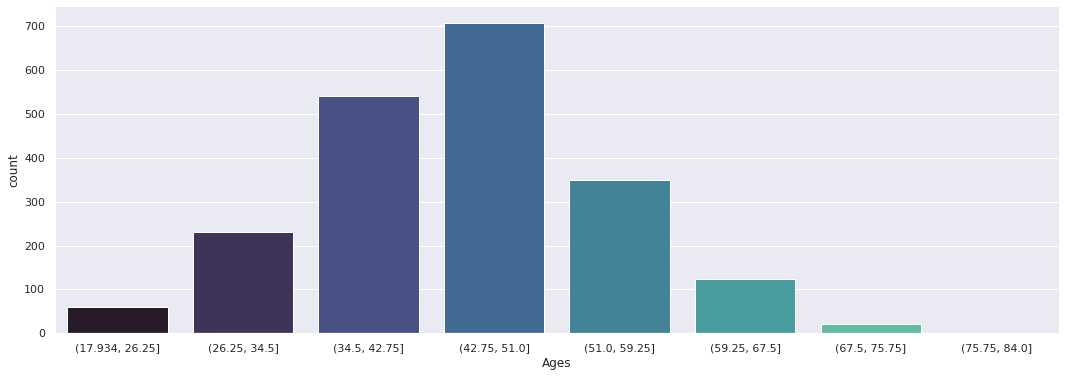

In [ ]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

df1 = df[df['Exited']==1]
df1['Ages'] = pd.cut(x=df1['Age'], bins=8)
sns.set(rc={'figure.figsize':(18,6)})
sns.countplot(x='Ages',data=df1,palette='mako' )
sns.despine()



1.We plotted a Bar Graph for the number of customers that left the bank per age group.
* Many of the customers that closed their accounts were aged between 34 - 59 years .
* The younger (17-26) and the older (66-84)  Customers had the least number of Customers who left the bank.
 * This may be attributed the the fact that 90% of millennials prefer smartphones for customer service/support interactions.   
 * However older generations still put more emphasis on customer service and real-life interaction , which is where today’s banks are heading towards with digitization, meaning that the older demographic will leave their bank if it means finding banks that better offer those traditional values and services today.


In [ ]:
df['Exited']=df['Exited'].astype('category')

In [ ]:
fig = px.scatter(
    data_frame=df, 
    x='Age',
    y='CreditScore', 
    animation_frame='Geography',
    size='Tenure', 
    facet_row='Exited',
    color='Exited',
    hover_data=['CustomerId','Gender','Age','Balance', 'NumOfProducts'],
    hover_name='Surname',
    trendline='ols',
    trendline_color_override='black'
)
fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
fig = px.scatter(
    data_frame=df, 
    x='Age',
    y='EstimatedSalary', 
    animation_frame='NumOfProducts',
    size='Tenure',
    facet_row='Exited',
    color='Exited',
    hover_data=['CustomerId','Gender','Age','Balance', 'NumOfProducts'],
    hover_name='Surname',
    size_max=25,
    trendline='ols', 
    trendline_color_override='black'
)
fig.show()

In [ ]:
fig = px.scatter(
    data_frame=df, 
    x='Balance',
    y='EstimatedSalary', 
    animation_frame='Geography',
    size='Tenure', 
    facet_row='Exited',
    color='Exited',
    hover_data=['CustomerId','Gender','Age','Balance', 'NumOfProducts'],
    hover_name='Surname',
    trendline='ols', 
    trendline_color_override='black'
)
fig.show()

Finally the last step of our EDA included plotting a Correlation matrix of the variables.

In [ ]:
# Label Encoding Gender and Geography columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

Text(0.5, 1.0, 'Multi-Collinearity of the Variables')

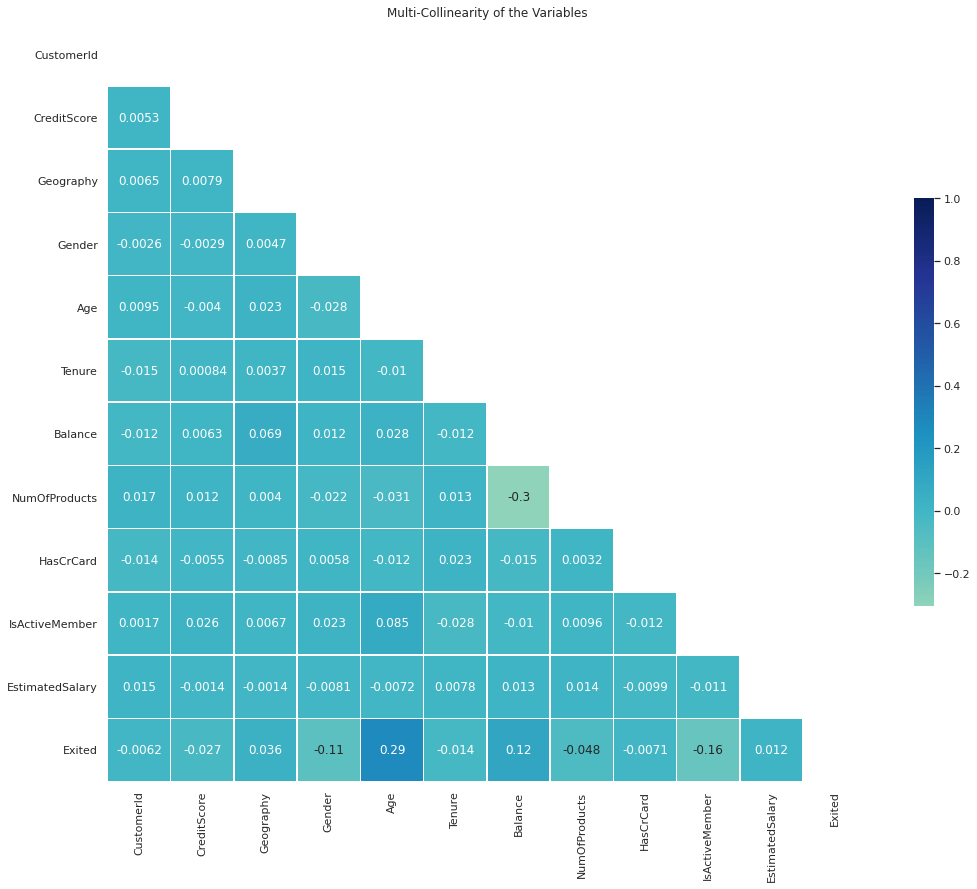

In [ ]:
#heat map for correlation purposes
sns.set(style="white")
# Create a covariance matrix
corr = df.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17,15))
# Generate a custom diverging colormap
cmap = "YlGnBu"
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, annot = True,
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of the Variables')

From the heatmap:

We can see there is a low positive correlation between Age and the target variable (Exited).

We can also see that Balance and the Number of products are the least correlated variables in our dataset with a correlation of -0.3.

However none of the Variables in the Dataset were strongly correlated with each other.


# **3.Classification Models.**

We built several models here in order to get the model that gave us the hightest accuracy score.
The models we built were : 

1.  DecisionTreeClassifier Model 
2.  RandomForestClassifier 
3.  AdaBoostClassifer
4. GradientBoostingClassifier
5. SupportVectorMachine 
6. KNearestNeighbors
7. XGBBoost



## **3.1.DecisionTreeClassifier Model**

In [ ]:
X=df.drop(['CustomerId','Exited'],axis=1)
y=df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# Fitting a DecisionTreeClassfier Model
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [ ]:
dtc_acc=accuracy_score(y_test,y_pred)
precision,recall,fscore,support=score(y_test,y_pred)
Dtc=['DTC',dtc_acc,precision.round(2),recall.round(2),fscore.round(2)]

# Evaluating the model performance

print('------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('------------------------------------------------------')


------------------------------------------------------
Accuracy Score: 0.7995
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1573
           1       0.53      0.52      0.52       427

    accuracy                           0.80      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.80      0.80      0.80      2000

------------------------------------------------------
Confusion Matrix:
[[1379  194]
 [ 207  220]]
------------------------------------------------------


In [ ]:
# Defining the Parameter Range
param_dist = {"max_depth": [3,5,6,7, None],
              "max_features": [1,2,3,4,5,6,7,8,9,10],
              "min_samples_leaf": [1,2,3,4,5,6,7],
              "criterion": ["gini", "entropy"]}

grid = GridSearchCV(estimator=dtc,param_grid=param_dist,cv=10)
grid.fit(X_train,y_train)

In [ ]:
#Obtaining the best parameters of my model
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'max_features': 10, 'min_samples_leaf': 7}


In [ ]:
# Fitting the hyperparameters to my model.
dtc = DecisionTreeClassifier(criterion='gini',max_depth=6,max_features=10,min_samples_leaf=10)
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [ ]:
dtc_acc=accuracy_score(y_test,y_pred)
precision,recall,fscore,support=score(y_test,y_pred)
Dtc_=['DTC Optimised',dtc_acc,precision.round(2),recall.round(2),fscore.round(2)]

# Evaluating the model performance

print('------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('------------------------------------------------------')


------------------------------------------------------
Accuracy Score: 0.859
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.77      0.44      0.56       405

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

------------------------------------------------------
Confusion Matrix:
[[1541   54]
 [ 228  177]]
------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



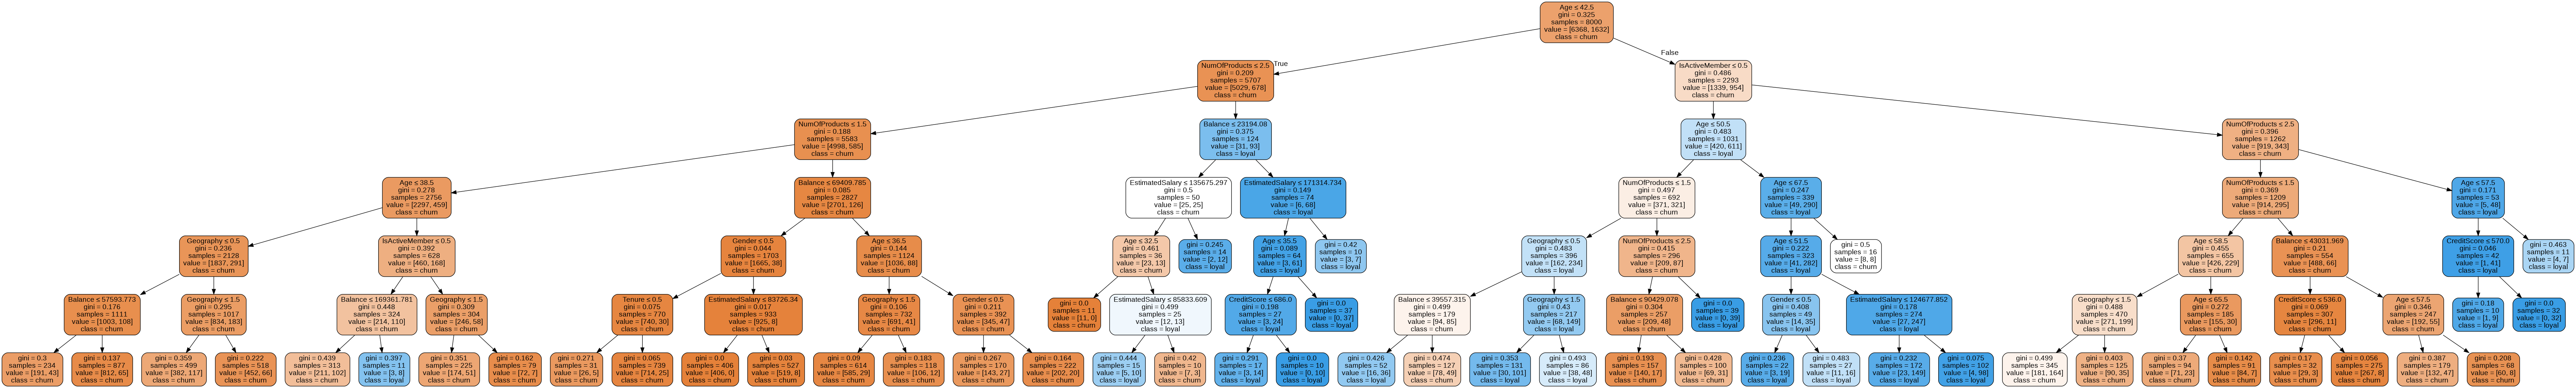

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import io

dot_data = io.StringIO()

#dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['churn', 'loyal'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Exited.png')
Image(graph.create_png())

### **3.1.1.Checking for overfitting in the model**

We decided to check for overfitting in our model by fitting the model and then testing how the model performns on a test set.

In [ ]:
X=df.drop(['CustomerId','Exited'],axis=1)
y=df['Exited']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=100)

In [ ]:
print('The X_train set was' , X_train.shape)
print("The X_val set was:" , X_val.shape)
print('The X_test set was:' ,X_test.shape)

The X_train set was (6000, 10)
The X_val set was: (2000, 10)
The X_test set was: (2000, 10)


In [ ]:
# Fitting the hyperparameters to my model.
dtc = DecisionTreeClassifier(criterion='gini',max_depth=6,max_features=10,min_samples_leaf=10)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_val)

In [ ]:
# Evaluating the model performance

print('------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_val,y_pred))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_val,y_pred))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_val,y_pred))
print('------------------------------------------------------')


------------------------------------------------------
Accuracy Score: 0.838
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1584
           1       0.68      0.42      0.52       416

    accuracy                           0.84      2000
   macro avg       0.77      0.69      0.71      2000
weighted avg       0.82      0.84      0.82      2000

------------------------------------------------------
Confusion Matrix:
[[1500   84]
 [ 240  176]]
------------------------------------------------------


Fitting the model to out test set we then get

In [ ]:
# Fitting the model on a test set
y_pred = dtc.predict(X_test)

In [ ]:
# Evaluating the model performance

print('------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('------------------------------------------------------')

------------------------------------------------------
Accuracy Score: 0.841
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.95      0.90      1585
           1       0.68      0.44      0.54       415

    accuracy                           0.84      2000
   macro avg       0.77      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000

------------------------------------------------------
Confusion Matrix:
[[1498   87]
 [ 231  184]]
------------------------------------------------------


##**3.2.RandomForestClassifier Model**

In [ ]:
# Fitting a RandomForestClassifier Model
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train,y_train)
y_predicted = rfc.predict(X_test) 

In [ ]:
rfc_acc=accuracy_score(y_test,y_predicted)
precision,recall,fscore,support=score(y_test,y_predicted)
Rfc=['RFC',rfc_acc,precision.round(2),recall.round(2),fscore.round(2)]

# Evaluating the Model Performsance
print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_predicted))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_predicted))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_predicted))
print('--------------------------------------------------------')


--------------------------------------------------------
Accuracy Score: 0.862
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.74      0.50      0.59       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

------------------------------------------------------
Confusion Matrix:
[[1523   72]
 [ 204  201]]
--------------------------------------------------------


In [ ]:
# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True,False]}

grid = GridSearchCV(estimator=rfc,param_grid=random_grid,cv=10)
grid.fit(X_train,y_train)

In [ ]:
# print best parameter after tuning 
grid.best_params_  

In [ ]:
# Fitting the Hyperparameters to my model.
rfc = RandomForestClassifier(n_estimators =500, min_samples_split= 10, min_samples_leaf= 15, max_features='auto', max_depth= 600, bootstrap=False)
rfc = rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test) 

In [ ]:
rfc_acc=accuracy_score(y_test,y_pred)
precision,recall,fscore,support=score(y_test,y_pred)
Rfc_=['RFC Optimised',rfc_acc,precision.round(2),recall.round(2),fscore.round(2)]

# Evaluating the Model Performance

print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('--------------------------------------------------------')


--------------------------------------------------------
Accuracy Score: 0.8675
--------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.77      0.50      0.60       405

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

--------------------------------------------------------
Confusion Matrix:
[[1534   61]
 [ 204  201]]
--------------------------------------------------------


### **3.2.1.Checking for overfitting in the model**

We decided to check for overfitting in our model by fitting the model and then testing how the model performns on a test set.

In [ ]:
X=df.drop(['CustomerId','Exited'],axis=1)
y=df['Exited']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=100)

In [ ]:
print('The X_train set was' , X_train.shape)
print("The X_val set was:" , X_val.shape)
print('The X_test set was:' ,X_test.shape)

The X_train set was (6000, 10)
The X_val set was: (2000, 10)
The X_test set was: (2000, 10)


In [ ]:
# Fitting the hyperparameters to my model.
rfc = RandomForestClassifier(n_estimators =500, min_samples_split= 10, min_samples_leaf= 15, max_features='auto', max_depth= 600, bootstrap=False)
rfc = rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_val) 

In [ ]:
# Evaluating the model performance

print('------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_val,y_pred))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_val,y_pred))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_val,y_pred))
print('------------------------------------------------------')


------------------------------------------------------
Accuracy Score: 0.8605
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1584
           1       0.82      0.43      0.56       416

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.86      0.86      0.84      2000

------------------------------------------------------
Confusion Matrix:
[[1544   40]
 [ 239  177]]
------------------------------------------------------


Fitting the model to out test set we then get

In [ ]:
# Fitting the model on a test set
y_pred = rfc.predict(X_test)

In [ ]:
# Evaluating the model performance

print('------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('------------------------------------------------------')

------------------------------------------------------
Accuracy Score: 0.863
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1585
           1       0.84      0.42      0.56       415

    accuracy                           0.86      2000
   macro avg       0.85      0.70      0.74      2000
weighted avg       0.86      0.86      0.84      2000

------------------------------------------------------
Confusion Matrix:
[[1551   34]
 [ 240  175]]
------------------------------------------------------


## **3.3.Ada boost**

In [ ]:
# Splitting our dataset into its attributes and labels
x = df.drop(['Exited','CustomerId'],axis=1).values
y = df['Exited'].values
# Train Test Split
x_train,x_test,y_train,y_test= train_test_split(x,y)

In [ ]:
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=102,)

ada_boost = ada_boost.fit(x_train, y_train)
y_pred_ada = ada_boost.predict(x_test)


In [ ]:
ada_acc=accuracy_score(y_test,y_pred_ada)
precision,recall,fscore,support=score(y_test,y_pred_ada)
ada=['ADA',ada_acc,precision.round(2),recall.round(2),fscore.round(2)]

# Printing the Evaluation Scores for the Model
print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred_ada))
print('--------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred_ada))
print('--------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_ada))
print('--------------------------------------------------------')


--------------------------------------------------------
Accuracy Score: 0.8096
--------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1981
           1       0.55      0.46      0.50       519

    accuracy                           0.81      2500
   macro avg       0.71      0.68      0.69      2500
weighted avg       0.80      0.81      0.80      2500

--------------------------------------------------------
Confusion Matrix:
[[1786  195]
 [ 281  238]]
--------------------------------------------------------


In [ ]:
AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [ ]:
param_dist = {
              "n_estimators": np.arange(100,900,100),
              'learning_rate':[1,0.1,0.3,0.01,0.03,0.001,0.003]
              }

grid = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=param_dist,verbose=1)
grid.fit(x,y)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed: 16.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [1, 0.1, 0.3, 0.01, 0.03, 0.001,
                                           0.003],
                         'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
# Printing the best parameters
grid.best_params_

{'learning_rate': 0.03, 'n_estimators': 600}

In [ ]:
# Fitting the model with the tuned Hyperparameters
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=600,learning_rate=0.03, random_state=102)

ada_boost = ada_boost.fit(x_train, y_train)
y_pred_ada = ada_boost.predict(x_test)


In [ ]:
ada_acc=accuracy_score(y_test,y_pred_ada)
precision,recall,fscore,support=score(y_test,y_pred_ada)
ada_=['ADA Optimised',ada_acc,precision.round(2),recall.round(2),fscore.round(2)]

# Printing the Evaluation Scores for the Model

print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred_ada))
print('--------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred_ada))
print('--------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_ada))
print('--------------------------------------------------------')


--------------------------------------------------------
Accuracy Score: 0.8528
--------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1981
           1       0.73      0.46      0.57       519

    accuracy                           0.85      2500
   macro avg       0.80      0.71      0.74      2500
weighted avg       0.84      0.85      0.84      2500

--------------------------------------------------------
Confusion Matrix:
[[1893   88]
 [ 280  239]]
--------------------------------------------------------


### **3.3.1.Checking for overfitting in the model**

We decided to check for overfitting in our model by fitting the model and then testing how the model performns on a test set.

In [ ]:
X=df.drop(['CustomerId','Exited'],axis=1)
y=df['Exited']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=100)

In [ ]:
print('The X_train set was' , X_train.shape)
print("The X_val set was:" , X_val.shape)
print('The X_test set was:' ,X_test.shape)

The X_train set was (6000, 10)
The X_val set was: (2000, 10)
The X_test set was: (2000, 10)


In [ ]:
# Fitting the model with the tuned Hyperparameters
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=600,learning_rate=0.03, random_state=102)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_val)


In [ ]:
# Evaluating the model performance

print('------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_val,y_pred_ada))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_val,y_pred_ada))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_val,y_pred_ada))
print('------------------------------------------------------')


------------------------------------------------------
Accuracy Score: 0.854
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1584
           1       0.75      0.44      0.56       416

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.84      0.85      0.84      2000

------------------------------------------------------
Confusion Matrix:
[[1523   61]
 [ 231  185]]
------------------------------------------------------


Fitting the model to out test set we then get

In [ ]:
# Fitting the model on a test set
y_pred_ada = ada_boost.predict(X_test)

In [ ]:
# Evaluating the model performance

print('------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred_ada))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred_ada))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_ada))
print('------------------------------------------------------')

------------------------------------------------------
Accuracy Score: 0.857
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1585
           1       0.78      0.43      0.56       415

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

------------------------------------------------------
Confusion Matrix:
[[1534   51]
 [ 235  180]]
------------------------------------------------------


## **3.4.Gradient boost**

In [ ]:
# Splitting our dataset into its attributes and labels
x = df.drop(['Exited','CustomerId'],axis=1).values
y = df['Exited'].values
# Train Test Split
x_train,x_test,y_train,y_test= train_test_split(x,y)

In [ ]:
gbr = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(x_train, y_train)

In [ ]:
# Making prediction
y_pred_gbr = gbr.predict(x_test)

In [ ]:
gbc_acc=accuracy_score(y_test,y_pred_gbr)
precision,recall,fscore,support=score(y_test,y_pred_gbr)
gbc=['GBC',gbc_acc,precision.round(2),recall.round(2),fscore.round(2)]

print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred_gbr))
print('--------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred_gbr))
print('--------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_gbr))
print('--------------------------------------------------------')

--------------------------------------------------------
Accuracy Score: 0.8712
--------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2002
           1       0.79      0.49      0.60       498

    accuracy                           0.87      2500
   macro avg       0.83      0.73      0.76      2500
weighted avg       0.86      0.87      0.86      2500

--------------------------------------------------------
Confusion Matrix:
[[1936   66]
 [ 256  242]]
--------------------------------------------------------


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

def get_dataset_():
  x=x=df.drop(['CustomerId','Exited'],axis=1);y=df['Exited'];return x, y

In [ ]:
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [ ]:
def get_models():
	models = dict()
	rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
	for r in rates:
		key = '%.4f' % r
		models[key] = GradientBoostingClassifier(learning_rate=r)
	return models
 
X, y = get_dataset_()

models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print(name, np.mean(scores))

0.0001 0.7963
0.0010 0.7963
0.0100 0.8399333333333332
0.1000 0.8639666666666665
1.0000 0.8404333333333333


In [ ]:
def get_models():
	models = dict()
	for i in range(1,11):
		models[str(i)] = GradientBoostingClassifier(min_samples_leaf=i)
	return models

X, y = get_dataset_()

models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print(name, np.mean(scores))

1 0.8640333333333333
2 0.8649000000000002
3 0.8649666666666669
4 0.8649666666666666
5 0.8643666666666666
6 0.8647666666666666
7 0.864533333333333
8 0.8642333333333334
9 0.8638999999999999
10 0.8640666666666665


In [ ]:
def get_models():
	models = dict()
	for i in np.arange(1,13):
		models[str(i)] = GradientBoostingClassifier(max_features=i)
	return models
 
X, y = get_dataset_()

models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print(name, np.mean(scores))

1 0.8577
2 0.8631
3 0.8632666666666666
4 0.8639666666666667
5 0.8636333333333331
6 0.8634
7 0.8636
8 0.8639333333333332
9 0.8639333333333332
10 0.8639333333333333
11 0.864
12 nan


In [ ]:
def get_models():
	models = dict()
	for i in np.arange(100,1000,100):
		models[str(i)] = GradientBoostingClassifier(n_estimators=i)
	return models

X, y = get_dataset_()
models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print(name, np.mean(scores))

100 0.864
200 0.8638666666666668
300 0.863
400 0.8629666666666667
500 0.8617666666666666
600 0.8611333333333332
700 0.8595333333333334
800 0.8586333333333332
900 0.8577666666666666


In [ ]:
# Building the model 
gbr = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2,max_features=11,min_samples_leaf=3,)
# Training the model using the training set
gbr = gbr.fit(x_train, y_train)

In [ ]:
# Making prediction
y_pred_gbr = gbr.predict(x_test)

In [ ]:
gbc_acc=accuracy_score(y_test,y_pred_gbr)
precision,recall,fscore,support=score(y_test,y_pred_gbr)
gbc_=['GBC Optimised',gbc_acc,precision.round(2),recall.round(2),fscore.round(2)]


print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred_gbr))
print('--------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred_gbr))
print('--------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_gbr))
print('--------------------------------------------------------')

--------------------------------------------------------
Accuracy Score: 0.8692
--------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2002
           1       0.80      0.46      0.58       498

    accuracy                           0.87      2500
   macro avg       0.84      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500

--------------------------------------------------------
Confusion Matrix:
[[1944   58]
 [ 269  229]]
--------------------------------------------------------


### **3.4.1.Checking for overfitting in the model**

We decided to check for overfitting in our model by fitting the model and then testing how the model performns on a test set.

In [ ]:
X=df.drop(['CustomerId','Exited'],axis=1)
y=df['Exited']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=100)

In [ ]:
print('The X_train set was' , X_train.shape)
print("The X_val set was:" , X_val.shape)
print('The X_test set was:' ,X_test.shape)

The X_train set was (6000, 10)
The X_val set was: (2000, 10)
The X_test set was: (2000, 10)


In [ ]:
# Fitting the model with the tuned Hyperparameters
gbr = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2,max_features=10,min_samples_leaf=3,)
# Training the model using the training set
gbr = gbr.fit(X_train, y_train)
# Making prediction
y_pred_gbr = gbr.predict(X_val)

In [ ]:
# Evaluating the model performance

print('------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_val,y_pred_gbr))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_val,y_pred_gbr))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_val,y_pred_gbr))
print('------------------------------------------------------')


------------------------------------------------------
Accuracy Score: 0.8605
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1584
           1       0.79      0.45      0.57       416

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

------------------------------------------------------
Confusion Matrix:
[[1533   51]
 [ 228  188]]
------------------------------------------------------


Fitting the model to out test set we then get

In [ ]:
# Fitting the model on a test set
y_pred_gbr = gbr.predict(X_test)

In [ ]:
# Evaluating the model performance

print('------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred_gbr))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred_gbr))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_gbr))
print('------------------------------------------------------')

------------------------------------------------------
Accuracy Score: 0.861
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.81      0.43      0.56       415

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.86      0.86      0.84      2000

------------------------------------------------------
Confusion Matrix:
[[1543   42]
 [ 236  179]]
------------------------------------------------------


##**3.5.SVC**

In [ ]:
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =40,stratify=y)
  

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#List the Hyperparameters
param_grid = {'C': [0.01, 0.1, 1, 10], 'gamma': [1,0.1,0.01,0.001]}

#SVC Object
clf = GridSearchCV(SVC(), param_grid, cv=5)

#Fitting the Model
clf.fit(X_train, y_train)

#best params
clf.best_params_

###**3.5.1.Polynomial**

In [ ]:
# Building the model 
polyclassifier = SVC(kernel='poly', C = 1, gamma = 0.1, degree=3)
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Making prediction
y_pred = polyclassifier.predict(X_test)

In [ ]:
poly_acc=accuracy_score(y_test,y_pred)
precision,recall,fscore,support=score(y_test,y_pred)
poly=['Poly SVM', poly_acc, precision.round(2),recall.round(2),fscore.round(2)]

# Printing the Evaluation Scores for the Model

print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('--------------------------------------------------------')


--------------------------------------------------------
Accuracy Score: 0.8535
--------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1593
           1       0.87      0.33      0.48       407

    accuracy                           0.85      2000
   macro avg       0.86      0.66      0.70      2000
weighted avg       0.86      0.85      0.83      2000

--------------------------------------------------------
Confusion Matrix:
[[1572   21]
 [ 272  135]]
--------------------------------------------------------


### **3.5.2.Linear**

In [ ]:
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =40,stratify=y)
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2,sampling_strategy='minority') 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [ ]:
# Building the model 
linclassifier = SVC(kernel='linear', C = 1, gamma = 0.1, degree=3)
# Training the model using the training set
linclassifier.fit(X_train_res, y_train_res)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Making prediction
y_pred = linclassifier.predict(X_test)

In [ ]:
lin_acc=accuracy_score(y_test,y_pred)
precision,recall,fscore,support=score(y_test,y_pred)
lin=['Linear SVM', lin_acc, precision.round(2),recall.round(2),fscore.round(2)]

# Printing the Evaluation Scores for the Model

print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred,zero_division=1))
print('--------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('--------------------------------------------------------')


--------------------------------------------------------
Accuracy Score: 0.67
--------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1593
           1       0.35      0.72      0.47       407

    accuracy                           0.67      2000
   macro avg       0.62      0.69      0.61      2000
weighted avg       0.79      0.67      0.70      2000

--------------------------------------------------------
Confusion Matrix:
[[1048  545]
 [ 115  292]]
--------------------------------------------------------


###**3.5.3.RBF**

In [ ]:
# Building the model 
rbfclassifier = SVC(kernel='rbf', C = 1, gamma = 0.1, degree=3)
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Making prediction
y_pred = rbfclassifier.predict(X_test)

In [ ]:
rbf_acc=accuracy_score(y_test,y_pred)
precision,recall,fscore,support=score(y_test,y_pred)
rbf_=['RBF Optimised', rbf_acc,precision.round(2),recall.round(2),fscore.round(2)]

# Printing the Evaluation Scores for the Model 

print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('--------------------------------------------------------')


Accuracy Score: 0.861
--------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.84      0.39      0.54       407

    accuracy                           0.86      2000
   macro avg       0.85      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000

--------------------------------------------------------
Confusion Matrix:
[[1562   31]
 [ 247  160]]


### **3.5.3.1.RBF without optimization**

In [ ]:
# Data preprocessing
X = df.drop(['CustomerId','Exited'],axis=1)
y = df.Exited

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =40,stratify=y)
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2,sampling_strategy='minority') 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

# Building the model 
rbfclassifier = SVC(kernel='rbf')

# Training the model using the training set
rbfclassifier.fit(X_train_res, y_train_res)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Making prediction
y_pred = rbfclassifier.predict(X_test)

rbf_acc=accuracy_score(y_test,y_pred)
precision,recall,fscore,support=score(y_test,y_pred)
rbf=['RBF', rbf_acc,precision.round(2),recall.round(2),fscore.round(2)]

# Printing the Evaluation Scores for the Model
print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred,zero_division=1))
print('--------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('--------------------------------------------------------')


--------------------------------------------------------
Accuracy Score: 0.4675
--------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.39      0.54      1593
           1       0.24      0.76      0.37       407

    accuracy                           0.47      2000
   macro avg       0.55      0.58      0.45      2000
weighted avg       0.74      0.47      0.51      2000

--------------------------------------------------------
Confusion Matrix:
[[626 967]
 [ 98 309]]
--------------------------------------------------------


##**3.6.K-Nearest Neighbor (KNN) Classifier**



Importing the Libraries

In [ ]:
# Splitting our dataset into its attributes and labels
X = df.drop(['Exited','CustomerId'],axis=1).values
y = df['Exited'].values
# Train Test Split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training and Predictions
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_acc=accuracy_score(y_test,y_pred)
precision,recall,fscore,support=score(y_test,y_pred)
knn=['KNN', knn_acc,precision.round(2),recall.round(2),fscore.round(2)]

# Evaluating the Algorithm

print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('--------------------------------------------------------')


--------------------------------------------------------
Accuracy Score: 0.828
--------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1617
           1       0.59      0.34      0.43       383

    accuracy                           0.83      2000
   macro avg       0.72      0.64      0.67      2000
weighted avg       0.81      0.83      0.81      2000

--------------------------------------------------------
Confusion Matrix:
[[1525   92]
 [ 252  131]]
--------------------------------------------------------


###**3.6.1.Hyperparameter Tuning of the KNN Base Model**

In [ ]:
#Splitting the dataset to features and labels
X = df.drop(['Exited','CustomerId'],axis=1).values
y = df['Exited'].values

#Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#standard scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
#List the Hyperparameters
leaf_size = list(range(1, 50))
n_neighbors= list(range(1, 40))
p = [1, 2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors , p=p)

#KNN Object
classifier1 = KNeighborsClassifier()
clf = GridSearchCV(classifier1, hyperparameters, cv=10,n_jobs=-1)

#Fitting the Model
clf.fit(X_train, y_train)

#best params
clf.best_params_



{'leaf_size': 1, 'n_neighbors': 37, 'p': 1}

In [ ]:
#making y predictions
classifier = KNeighborsClassifier(leaf_size=30,p=2,n_neighbors=36)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)
#model score


[0 0 0 ... 0 0 0]


In [ ]:
knn_acc=accuracy_score(y_test,y_pred)
precision,recall,fscore,support=score(y_test,y_pred)
knn_=['KNN Optimised', knn_acc,precision.round(2),recall.round(2),fscore.round(2)]

# Printing the Evaluation Scores for the 
print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('--------------------------------------------------------')

--------------------------------------------------------
Accuracy Score: 0.806
--------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1595
           1       0.55      0.22      0.32       405

    accuracy                           0.81      2000
   macro avg       0.69      0.59      0.60      2000
weighted avg       0.77      0.81      0.77      2000

--------------------------------------------------------
Confusion Matrix:
[[1522   73]
 [ 315   90]]
--------------------------------------------------------


## **3.7.XGboost**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Splitting our dataset into its attributes and labels
x = df.drop(['Exited','CustomerId'],axis=1).values
y = df['Exited'].values
# Train Test Split
x_train,x_test,y_train,y_test= train_test_split(x,y)

In [ ]:
xgb=XGBClassifier(max_depth=4,eta=0.01,subsample=0.4)

xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.01, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.4, verbosity=1)

In [ ]:
# Making prediction
y_pred = xgb.predict(x_test)

In [ ]:
Xgb_acc=accuracy_score(y_test,y_pred)
precision,recall,fscore,support=score(y_test,y_pred)
Xgb=['XGB', Xgb_acc,precision.round(2),recall.round(2),fscore.round(2)]

print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('--------------------------------------------------------')

--------------------------------------------------------
Accuracy Score: 0.8748
--------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2002
           1       0.80      0.50      0.61       498

    accuracy                           0.87      2500
   macro avg       0.84      0.73      0.77      2500
weighted avg       0.87      0.87      0.86      2500

--------------------------------------------------------
Confusion Matrix:
[[1938   64]
 [ 249  249]]
--------------------------------------------------------


In [ ]:
grid=GridSearchCV(estimator=XGBClassifier(),param_grid={'eta':[0.0001, 0.001, 0.01, 0.1, 1.0],'max_depth':np.arange(1,11),'subsample':np.arange(0.1, 1.1, 0.1)},verbose=1)
grid.fit(x,y)
print('The best parameters ',grid.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed: 34.3min finished


The best parameters  {'eta': 0.0001, 'max_depth': 4, 'subsample': 0.9}


In [ ]:
# Fitting the model with the tuned Hyperparameters
xbg=XGBClassifier(max_depth=4,eta=0.001,subsample=0.9)
xgb.fit(x_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.01, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [ ]:
# Making prediction
y_pred = xgb.predict(x_test)

In [ ]:
Xgb_acc=accuracy_score(y_test,y_pred)
precision,recall,fscore,support=score(y_test,y_pred)
Xgb_=['XGB Optimised', Xgb_acc,precision.round(2),recall.round(2),fscore.round(2)]

print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('--------------------------------------------------------')

--------------------------------------------------------
Accuracy Score: 0.8732
--------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.89      0.97      0.92      2002
           1       0.78      0.50      0.61       498

    accuracy                           0.87      2500
   macro avg       0.83      0.73      0.77      2500
weighted avg       0.87      0.87      0.86      2500

--------------------------------------------------------
Confusion Matrix:
[[1933   69]
 [ 248  250]]
--------------------------------------------------------


### **3.7.1.Checking for overfitting in the model**

We decided to check for overfitting in our model by fitting the model and then testing how the model performns on a test set.

In [ ]:
X=df.drop(['CustomerId','Exited'],axis=1)
y=df['Exited']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
print('The X_train set was' , X_train.shape)
print("The X_val set was:" , X_val.shape)
print('The X_test set was:' ,X_test.shape)

The X_train set was (6000, 10)
The X_val set was: (2000, 10)
The X_test set was: (2000, 10)


In [ ]:
# Fitting the hyperparameters to my model.
# Fitting the model with the tuned Hyperparameters
xgb=XGBClassifier(max_depth=4,eta=0.001,subsample=0.9)
xgb = xgb.fit(X_train,y_train) 
y_pred = xgb.predict(X_val)

In [ ]:
# Evaluating the model performance

print('------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_val,y_pred))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_val,y_pred))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_val,y_pred))
print('------------------------------------------------------')


------------------------------------------------------
Accuracy Score: 0.8505
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1585
           1       0.73      0.44      0.55       415

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000

------------------------------------------------------
Confusion Matrix:
[[1519   66]
 [ 233  182]]
------------------------------------------------------


Fitting the model to out test set we then get

In [ ]:
# Fitting the model on a test set
y_pred = xgb.predict(X_test)

In [ ]:
# Evaluating the model performance

print('------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('------------------------------------------------------')

------------------------------------------------------
Accuracy Score: 0.8665
------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.81      0.47      0.59       415

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000

------------------------------------------------------
Confusion Matrix:
[[1538   47]
 [ 220  195]]
------------------------------------------------------


## **3.8.Algorithm Comparison**

The Best Performing models were the :


In [ ]:
data = [Dtc,Dtc_,Rfc,Rfc_,ada,ada_,gbc,gbc_,poly,lin,rbf,rbf_,knn,knn_,Xgb,Xgb_] 
# Create the pandas DataFrame 
models_all = pd.DataFrame(data, columns = ['Model', 'Accuracy','precision [0,1]','recall [0,1]','f score [0,1]'], ) 
models_all.sort_values(by='Accuracy',ascending=False)

Model  Accuracy precision [0,1]  recall [0,1] f score [0,1]
14            XGB    0.8748     [0.89, 0.8]   [0.97, 0.5]  [0.93, 0.61]
15  XGB Optimised    0.8732    [0.89, 0.78]   [0.97, 0.5]  [0.92, 0.61]
6             GBC    0.8712    [0.88, 0.79]  [0.97, 0.49]   [0.92, 0.6]
7   GBC Optimised    0.8692     [0.88, 0.8]  [0.97, 0.46]  [0.92, 0.58]
3   RFC Optimised    0.8675    [0.88, 0.77]   [0.96, 0.5]   [0.92, 0.6]
2             RFC    0.8620    [0.88, 0.74]   [0.95, 0.5]  [0.92, 0.59]
11  RBF Optimised    0.8610    [0.86, 0.84]  [0.98, 0.39]  [0.92, 0.54]
1   DTC Optimised    0.8590    [0.87, 0.77]  [0.97, 0.44]  [0.92, 0.56]
8        Poly SVM    0.8535    [0.85, 0.87]  [0.99, 0.33]  [0.91, 0.48]
5   ADA Optimised    0.8528    [0.87, 0.73]  [0.96, 0.46]  [0.91, 0.57]
12            KNN    0.8280    [0.86, 0.59]  [0.94, 0.34]   [0.9, 0.43]
4             ADA    0.8096    [0.89, 0.55]   [0.9, 0.46]   [0.88, 0.5]
13  KNN Optimised    0.8060    [0.93, 0.55]  [0.95, 0.22]  [0.89, 0.32]
0             DTC    0.7995    [0.87, 0.53]  [0.88, 0.52]  [0.87, 0.52]
9      Linear SVM    0.6700     [0.9, 0.35]  [0.66, 0.72]  [0.76, 0.47]
10            RBF    0.4675    [0.86, 0.24]  [0.39, 0.76]  [0.54, 0.37]

# **4. Challenging the Solution**


Here we opted to build a Deep Learning Model to see if it offered a higher accuracy score compared to the Machine Learning Models we had built above.

## **4.1 Neural Network**

In [ ]:
X=df.drop(['CustomerId','Exited'],axis=1)
y=df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(25,25), solver='sgd', activation='identity')

# Fitting the model
mlp.fit(X_train,y_train)

# Making predictions
y_pred = mlp.predict(X_test)

In [ ]:
print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred)
print('--------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('--------------------------------------------------------')

--------------------------------------------------------
Accuracy Score: 0.813
--------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1597
           1       0.63      0.18      0.28       403

    accuracy                           0.81      2000
   macro avg       0.73      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

--------------------------------------------------------
Confusion Matrix:
[[1554   43]
 [ 331   72]]
--------------------------------------------------------


###  **NeuralNet Model with Hyperparameter Tuning**

In [ ]:
X=df.drop(['CustomerId','Exited'],axis=1)
y=df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,stratify=y)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=10000)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=10000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

In [ ]:
clf.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (20,),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [ ]:
# Making predictions
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu',alpha=0.001,hidden_layer_sizes=20,learning_rate='constant',solver='adam',max_iter=100000)
mlp = mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('--------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("Classification Report :")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('--------------------------------------------------------')

--------------------------------------------------------
Accuracy Score: 0.799
--------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      3185
           1       0.53      0.13      0.21       815

    accuracy                           0.80      4000
   macro avg       0.67      0.55      0.55      4000
weighted avg       0.75      0.80      0.75      4000

--------------------------------------------------------
Confusion Matrix:
[[3092   93]
 [ 711  104]]
--------------------------------------------------------


#**5.Conclusion and Recommendations.**

For Services such as banks customer is King , therefore any measures that can prevent churning are important and should be undertaken. Therefore with the observations made from this analysis we would recommend that :


1. The bank should offer more tailor made services to their clients.
For Instance with the younger demographic that prefers mobile banking ,the bank should offer more digital options while for the older generations who still prefer in-person interactions the Bank should be willing and able to provide them with this experience.

2.Churn can increase by up to 15% if businesses fail to respond to    customers over social media 
* According to an article by the new voice media faced with poor customer service, 20% of consumers would complain publicly via social media , if they receive a quick response or even an acknowledgment of the receipt of their request, it will result in customer satisfaction and improved loyalty
. Therefore the bank needs to carry out customer perception surveys through the relevant media channels in order to get customer feedback.

3. Our research indicated that women are more susceptible to leaving for better customer service or advisory services and for the bank to retain these customers they must be able to offer them these services.